# Importe Librairies

In [41]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import sklearn.linear_model as linear_model

# Import dataset

In [2]:
df_train = pd.read_csv("train.csv", index_col="Id" )
print("df_train shape:",df_train.shape)
print(df_train.info())
df_train.head(10)

df_train shape: (1460, 80)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-n

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   
6           50       RL         85.0    14115   Pave   NaN      IR1   
7           20       RL         75.0    10084   Pave   NaN      Reg   
8           60       RL          NaN    10382   Pave   NaN      IR1   
9           50       RM         51.0     6120   Pave   NaN      Reg   
10         190       RL         50.0     7420   Pave   NaN      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
6          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
7          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
8          Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
9          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
10         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   
6        Norm     1Fam     1.5Fin            5            5       1993   
7        Norm     1Fam     1Story            8            5       2004   
8        Norm     1Fam     2Story            7            6       1973   
9        Norm     1Fam     1.5Fin            7            5       1931   
10     Artery   2fmCon     1.5Unf            5            6       1939   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
6           1995     Gable  CompShg     VinylSd     VinylSd       None   
7           2005     Gable  CompShg     VinylSd     VinylSd      Stone   
8           1973     Gable  CompShg     HdBoard     HdBoard      Stone   
9           1950     Gable  CompShg     BrkFace     Wd Shng       None   
10          1950     Gable  CompShg     MetalSd     MetalSd       None   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd    

In [3]:
#df_train["MSZoning"] = df_train["MSZoning"].astype(str)
#df_train.dropna(inplace=True)
print(df_train.shape)
df_train.head(10)

(1460, 80)


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   
6           50       RL         85.0    14115   Pave   NaN      IR1   
7           20       RL         75.0    10084   Pave   NaN      Reg   
8           60       RL          NaN    10382   Pave   NaN      IR1   
9           50       RM         51.0     6120   Pave   NaN      Reg   
10         190       RL         50.0     7420   Pave   NaN      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
6          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
7          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
8          Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
9          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
10         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   
6        Norm     1Fam     1.5Fin            5            5       1993   
7        Norm     1Fam     1Story            8            5       2004   
8        Norm     1Fam     2Story            7            6       1973   
9        Norm     1Fam     1.5Fin            7            5       1931   
10     Artery   2fmCon     1.5Unf            5            6       1939   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
6           1995     Gable  CompShg     VinylSd     VinylSd       None   
7           2005     Gable  CompShg     VinylSd     VinylSd      Stone   
8           1973     Gable  CompShg     HdBoard     HdBoard      Stone   
9           1950     Gable  CompShg     BrkFace     Wd Shng       None   
10          1950     Gable  CompShg     MetalSd     MetalSd       None   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd    

In [4]:
df_train["GarageYrBlt"]

Id
1       2003.0
2       1976.0
3       2001.0
4       1998.0
5       2000.0
6       1993.0
7       2004.0
8       1973.0
9       1931.0
10      1939.0
11      1965.0
12      2005.0
13      1962.0
14      2006.0
15      1960.0
16      1991.0
17      1970.0
18      1967.0
19      2004.0
20      1958.0
21      2005.0
22      1930.0
23      2002.0
24      1976.0
25      1968.0
26      2007.0
27      2005.0
28      2008.0
29      1957.0
30      1920.0
31      1920.0
32      1966.0
33      2007.0
34      1959.0
35      2005.0
36      2004.0
37      1995.0
38      1954.0
39      1953.0
40         NaN
41      1965.0
42      1959.0
43      1983.0
44      1977.0
45      1959.0
46      2005.0
47      2003.0
48      2006.0
49         NaN
50      1966.0
51      1997.0
52      1985.0
53      1963.0
54      1981.0
55      1962.0
56      1964.0
57      1999.0
58      2004.0
59      2006.0
60      1973.0
61      2006.0
62      1935.0
63      2006.0
64      1990.0
65      1998.0
66      2004.0
67     

In [5]:
df_test = pd.read_csv("test.csv")
print(df_test.shape)
print(df_test.info())
df_test.head(10)

(1459, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 1

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   
5  1466          60       RL         75.0    10000   Pave   NaN      IR1   
6  1467          20       RL          NaN     7980   Pave   NaN      IR1   
7  1468          60       RL         63.0     8402   Pave   NaN      IR1   
8  1469          20       RL         85.0    10176   Pave   NaN      Reg   
9  1470          20       RL         70.0     8400   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   
5         Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
6         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
7         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
8         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
9         Lvl    AllPub    Corner       Gtl        NAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   
5       Norm     1Fam     2Story            6            5       1993   
6       Norm     1Fam     1Story            6            7       1992   
7       Norm     1Fam     2Story            6            5       1998   
8       Norm     1Fam     1Story            7            5       1990   
9       Norm     1Fam     1Story            4            5       1970   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   
5          1994     Gable  CompShg     HdBoard     HdBoard       None   
6          2007     Gable  CompShg     HdBoard     HdBoard       None   
7          1998     Gable  CompShg     VinylSd     VinylSd       None   
8          1990     Gable  CompShg     HdBoard     HdBoard       None   
9          1970     Gable  CompShg     Plywood     Plywood       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   
5         0.0        TA        TA      PConc       Gd       TA           No   
6         0.0        TA        Gd      PConc       Gd       TA           No   
7         0.0        TA        TA      PConc       Gd       TA           No   
8         0.0        TA        TA      PConc       Gd       TA     

In [6]:
df_train.tail(10)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1451          90       RL         60.0     9000   Pave   NaN      Reg   
1452          20       RL         78.0     9262   Pave   NaN      Reg   
1453         180       RM         35.0     3675   Pave   NaN      Reg   
1454          20       RL         90.0    17217   Pave   NaN      Reg   
1455          20       FV         62.0     7500   Pave  Pave      Reg   
1456          60       RL         62.0     7917   Pave   NaN      Reg   
1457          20       RL         85.0    13175   Pave   NaN      Reg   
1458          70       RL         66.0     9042   Pave   NaN      Reg   
1459          20       RL         68.0     9717   Pave   NaN      Reg   
1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                       
1451         Lvl    AllPub       FR2       Gtl        NAmes       Norm   
1452         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1453         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
1454         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1455         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1456         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1457         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1458         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1459         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1460         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                         
1451       Norm   Duplex     2Story            5            5       1974   
1452       Norm     1Fam     1Story            8            5       2008   
1453       Norm   TwnhsE       SLvl            5            5       2005   
1454       Norm     1Fam     1Story            5            5       2006   
1455       Norm     1Fam     1Story            7            5       2004   
1456       Norm     1Fam     2Story            6            5       1999   
1457       Norm     1Fam     1Story            6            6       1978   
1458       Norm     1Fam     2Story            7            9       1941   
1459       Norm     1Fam     1Story            5            6       1950   
1460       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                         
1451          1974     Gable  CompShg     VinylSd     VinylSd       None   
1452          2009     Gable  CompShg     CemntBd     CmentBd      Stone   
1453          2005     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1454          2006     Gable  CompShg     VinylSd     VinylSd       None   
1455          2005     Gable  CompShg     VinylSd     VinylSd       None   
1456          2000     Gable  CompShg     VinylSd     VinylSd       None   
1457          1988     Gable  CompShg     Plywood     Plywood      Stone   
1458          2006     Gable  CompShg     CemntBd     CmentBd       None   
1459          1996       Hip  CompShg     MetalSd     MetalSd       None   
1460          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
Id                                                                  
1451         0.0        TA        TA     CBlock       Gd       TA   
1452       194.0        Gd        TA      PConc       Gd       TA   
1453        80.0        TA        TA      PConc       Gd       TA   
1454         0.0        TA        TA      PConc       Gd       TA   


In [7]:
df_train.isnull().sum()/len(df_train)

MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
Heating     

In [8]:
df_train.select_dtypes("object").nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

## Missing data

#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

## Codification NaN of some categories variables

In [9]:
df_train["BsmtQual"].fillna('No Basement', inplace=True)
df_train["BsmtCond"].fillna('No Basement', inplace=True)
df_train["BsmtExposure"].fillna('No Basement', inplace=True)
df_train["BsmtFinType1"].fillna('No Basement', inplace=True)
df_train["BsmtFinType2"].fillna('No Basement', inplace=True)

df_train["GarageType"].fillna('No Garage', inplace=True)
df_train["GarageFinish"].fillna('No Garage', inplace=True)
df_train["GarageQual"].fillna('No Garage', inplace=True)
df_train["GarageCond"].fillna('No Garage', inplace=True)

df_train["Alley"].fillna('No alley access', inplace=True)
df_train["FireplaceQu"].fillna('No Fireplace', inplace=True)
df_train["PoolQC"].fillna('No Pool', inplace=True)
df_train["Fence"].fillna('No Fence', inplace=True)
df_train["MiscFeature"].fillna('None', inplace=True)

## Codification NaN of some numerical and categories variables

In [56]:
numerical_column = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
numerical_column.remove('SalePrice')
#numerical_column.remove('Id')
category_column = [f for f in df_train.columns if df_train.dtypes[f] == 'object']

In [57]:
#category_column = df_train.select_dtypes(include = ["object"]).columns.tolist()
#numerical_column = df_train.select_dtypes(include = ["int64", "float64"]).columns.tolist()

for column in df_train:
    if df_train[column].isnull().any():
        if (column in category_column):
            df_train[column] = df_train[column].fillna(df_train[column].mode()[0]) 
        else:
            df_train[column] = df_train[column].fillna(df_train[column].mean)

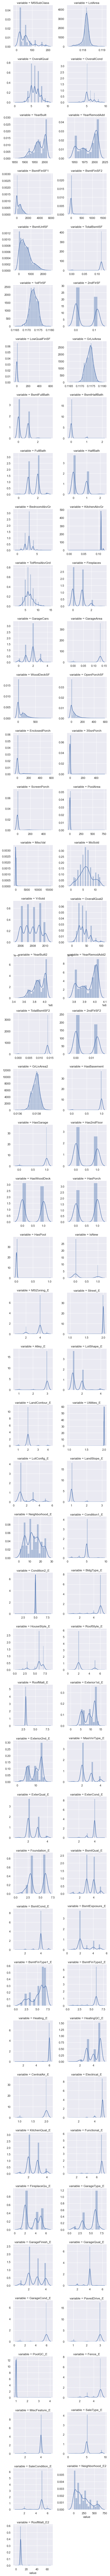

In [58]:
f = pd.melt(df_train, value_vars=numerical_column)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

## check rows with NaN

In [11]:
df_train.dropna(inplace=True)
print(df_train.shape)
df_train.head()

(1460, 80)


MSSubClass MSZoning LotFrontage  LotArea Street            Alley LotShape  \
Id                                                                              
1           60       RL        65.0     8450   Pave  No alley access      Reg   
2           20       RL        80.0     9600   Pave  No alley access      Reg   
3           60       RL        68.0    11250   Pave  No alley access      IR1   
4           70       RL        60.0     9550   Pave  No alley access      IR1   
5           60       RL        84.0    14260   Pave  No alley access      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                            
1       196.0        Gd        TA      PConc       Gd       TA           No   
2         0.0        TA        TA     CBlock       Gd       TA           Gd   
3       162.0        Gd        TA      PConc       Gd       TA           Mn   
4         0.0        TA        TA     BrkTil       TA       Gd           No   
5       350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2        

In [12]:
df_train.select_dtypes("number")

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                             
1             60     8450            7            5       2003          2003   
2             20     9600            6            8       1976          1976   
3             60    11250            7            5       2001          2002   
4             70     9550            7            5       1915          1970   
5             60    14260            8            5       2000          2000   
6             50    14115            5            5       1993          1995   
7             20    10084            8            5       2004          2005   
8             60    10382            7            6       1973          1973   
9             50     6120            7            5       1931          1950   
10           190     7420            5            6       1939          1950   
11            20    11200            5            5       1965          1965   
12            60    11924            9            5       2005          2006   
13            20    12968            5            6       1962          1962   
14            20    10652            7            5       2006          2007   
15            20    10920            6            5       1960          1960   
16            45     6120            7            8       1929          2001   
17            20    11241            6            7       1970          1970   
18            90    10791            4            5       1967          1967   
19            20    13695            5            5       2004          2004   
20            20     7560            5            6       1958          1965   
21            60    14215            8            5       2005          2006   
22            45     7449            7            7       1930          1950   
23            20     9742            8            5       2002          2002   
24           120     4224            5            7       1976          1976   
25            20     8246            5            8       1968          2001   
26            20    14230            8            5       2007          2007   
27            20     7200            5            7       1951          2000   
28            20    11478            8            5       2007          2008   
29            20    16321            5            6       1957          1997   
30            30     6324            4            6       1927          1950   
31            70     8500            4            4       1920          1950   
32            20     8544            5            6       1966          2006   
33            20    11049            8            5       2007          2007   
34            20    10552            5            5       1959          1959   
35           120     7313            9            5       2005          2005   
36            60    13418            8            5       2004          2005   
37            20    10859            5            5       1994          1995   
38            20     8532            5            6       1954          1990   
39            20     7922            5            7       1953          2007   
40            90     6040            4            5       1955          1955   
41            20     8658            6            5       1965          1965   
42            20    16905            5            6       1959          1959   
43            85     9180            5            7       1983          1983   
44            20     9200            5            6       1975          1980   
45            20     7945            5            6       1959          1959   
46           120     7658            9            5       2005          2005   
47            50    12822            7            5       2003          2003   
48            20    11096            8            5       2006          2006   
49    

In [13]:
df_train["GarageYrBlt"]

Id
1                                                  2003.0
2                                                  1976.0
3                                                  2001.0
4                                                  1998.0
5                                                  2000.0
6                                                  1993.0
7                                                  2004.0
8                                                  1973.0
9                                                  1931.0
10                                                 1939.0
11                                                 1965.0
12                                                 2005.0
13                                                 1962.0
14                                                 2006.0
15                                                 1960.0
16                                                 1991.0
17                                                 1970.0
18         

## Analysing SalePrice

In [14]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

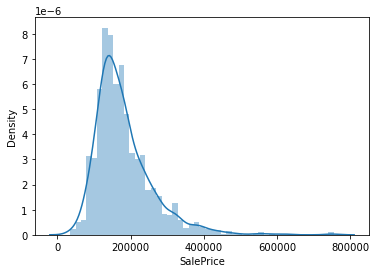

In [15]:
sns.distplot(df_train['SalePrice']);

## Relationship with numerical features

numerical: 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold

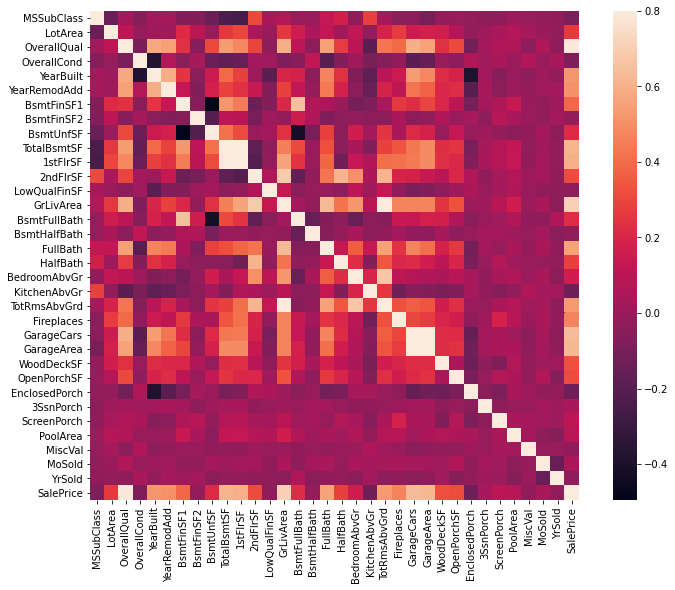

In [16]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

### Restriction of features

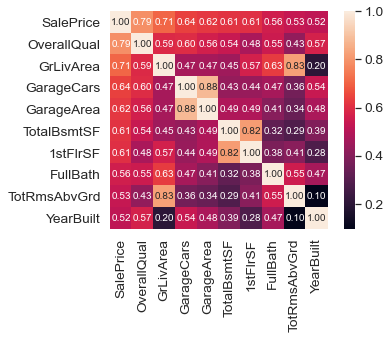

In [17]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

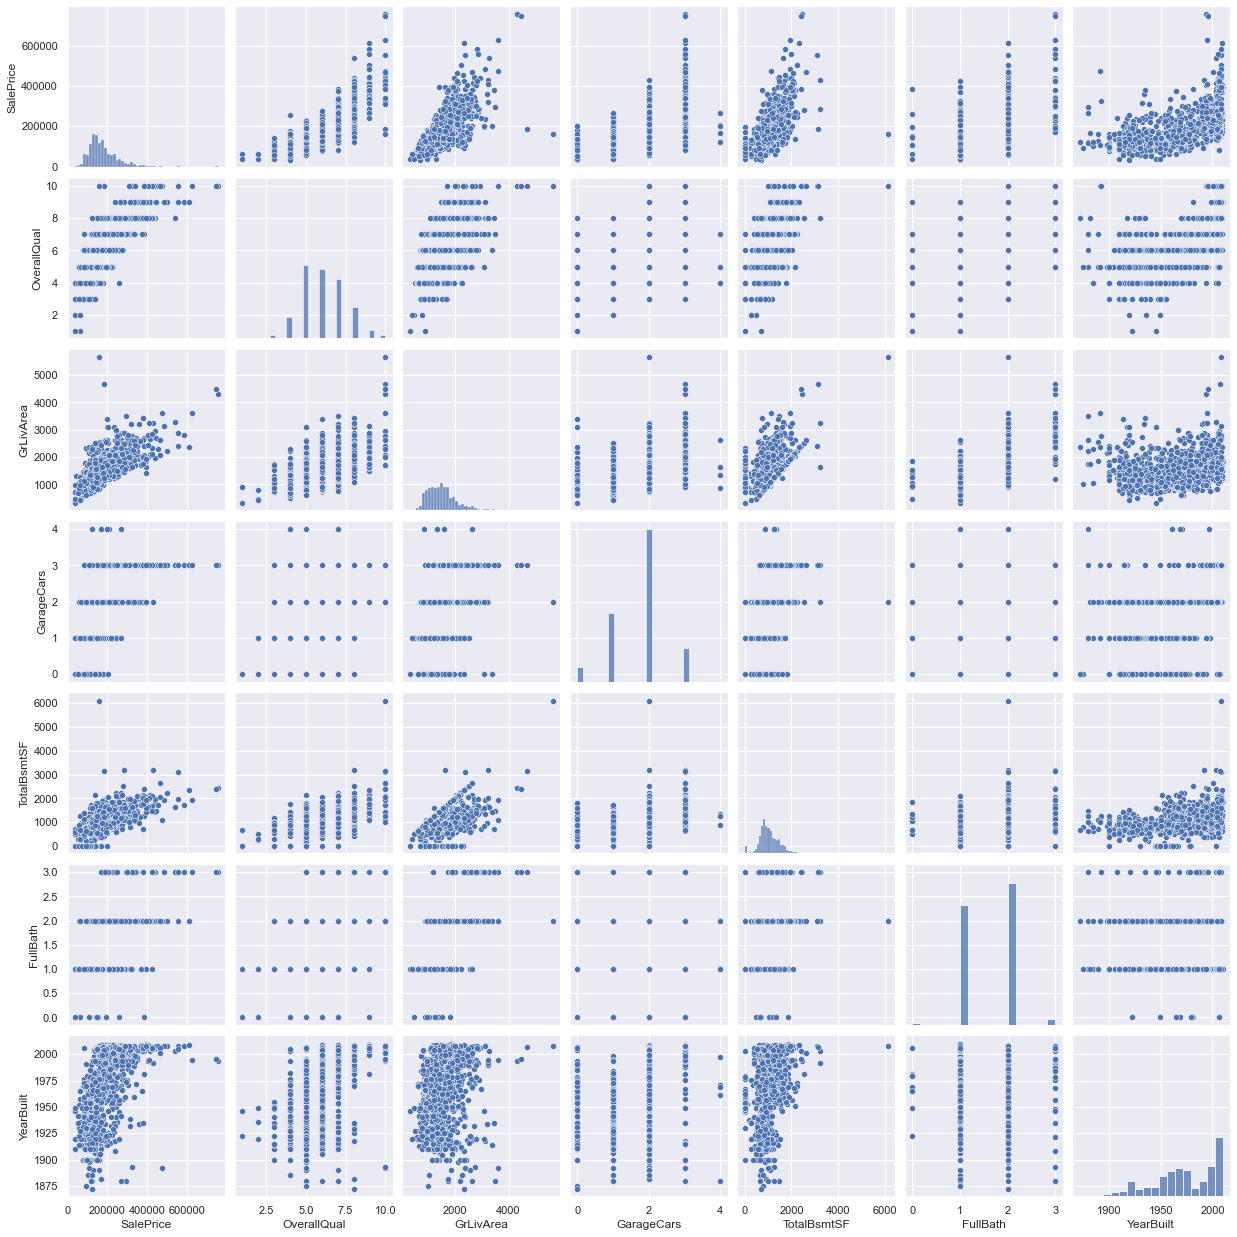

In [18]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

## Relationship with categorical features

Categories: Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities,

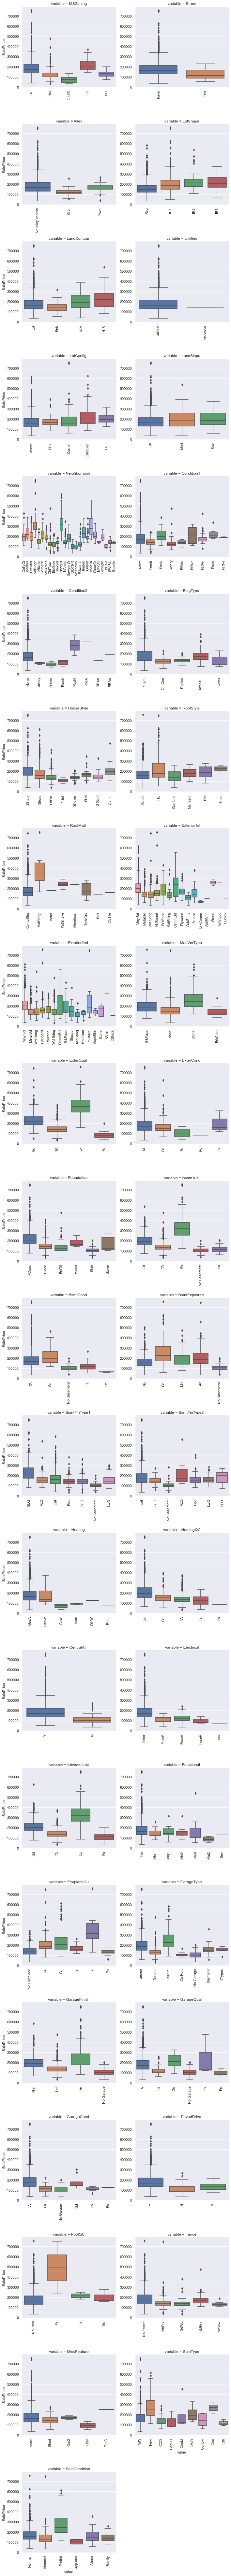

In [21]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x = plt.xticks(rotation=90)
f = pd.melt(df_train, id_vars=['SalePrice'], value_vars = category_column)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

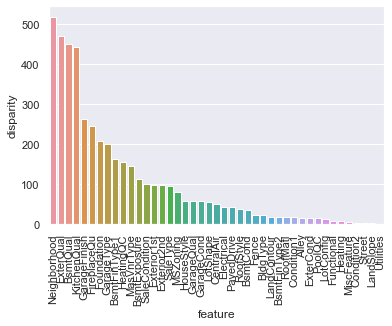

In [25]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = category_column
    pvals = []
    for c in category_column:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(df_train)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

In [38]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
qual_encoded = []
for q in category_column:  
    encode(df_train, q)
    qual_encoded.append(q+'_E')
print(qual_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


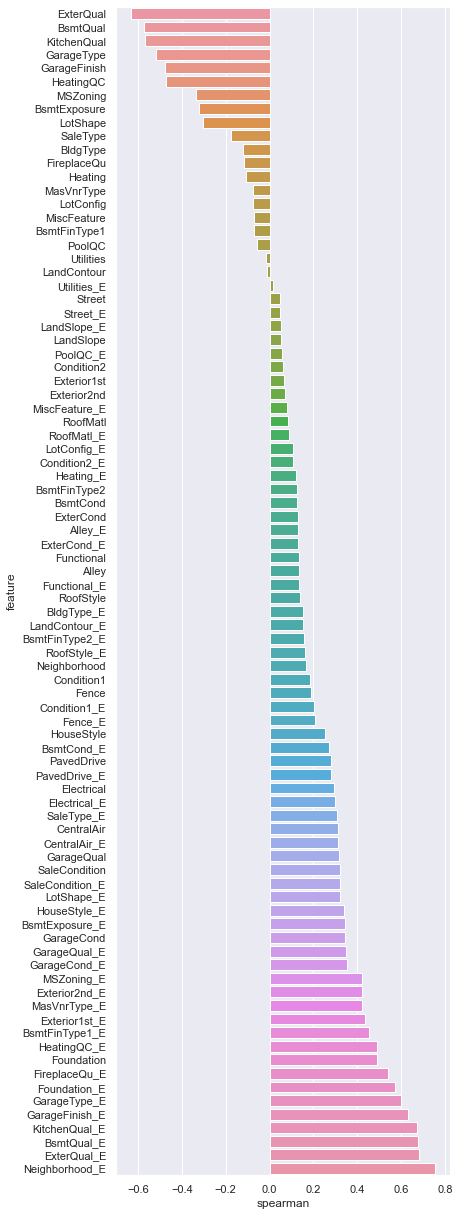

In [40]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = category_column + qual_encoded
spearman(df_train, features)

## Regression

In [59]:
def error(actual, predicted):
    actual = np.log(actual)
    predicted = np.log(predicted)
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))

def log_transform(feature):
    df_train[feature] = np.log1p(df_train[feature].values)

def quadratic(feature):
    df_train[feature +'2'] = df_train[feature]**2
    
log_transform('GrLivArea')
log_transform('1stFlrSF')
log_transform('2ndFlrSF')
log_transform('TotalBsmtSF')
log_transform('LotArea')
#log_transform('LotFrontage')
log_transform('KitchenAbvGr')
log_transform('GarageArea')

quadratic('OverallQual')
quadratic('YearBuilt')
quadratic('YearRemodAdd')
quadratic('TotalBsmtSF')
quadratic('2ndFlrSF')
quadratic('Neighborhood_E')
quadratic('RoofMatl_E')
quadratic('GrLivArea')

qdr = ['OverallQual2', 'YearBuilt2', 'YearRemodAdd2', 'TotalBsmtSF2',
        '2ndFlrSF2', 'Neighborhood_E2', 'RoofMatl_E2', 'GrLivArea2']

df_train['HasBasement'] = df_train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_train['HasGarage'] = df_train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_train['Has2ndFloor'] = df_train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
#df_train['HasMasVnr'] = df_train['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)
df_train['HasWoodDeck'] = df_train['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)
df_train['HasPorch'] = df_train['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
df_train['HasPool'] = df_train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_train['IsNew'] = df_train['YearBuilt'].apply(lambda x: 1 if x > 2000 else 0)

boolean = ['HasBasement', 'HasGarage', 'Has2ndFloor',  'HasWoodDeck',
            'HasPorch', 'HasPool', 'IsNew'] #'HasMasVnr',


features =  qual_encoded + boolean  + qdr + numerical_column
lasso = linear_model.LassoLarsCV(max_iter=10000)
X = df_train[features].fillna(0.).values
Y = df_train['SalePrice'].values
lasso.fit(X, np.log(Y))

Ypred = np.exp(lasso.predict(X))
error(Y, Ypred)

0.12671317017931605